In [7]:
import matplotlib.pyplot as plt
import numpy as np
from brokenaxes import brokenaxes
import corner as corner
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle, ConnectionPatch

# Figure settings
### FIGURE SIZES
fig_width_pt = 2 * 246.0  # Get this from LaTeX using \the\columnwidth (this is for prd)
inches_per_pt = 1.0 / 72.27  # Convert pt to inch
golden_mean = (np.sqrt(5) - 1.0) / 2.0  # Aesthetic ratio
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = float(fig_width * golden_mean)  # height in inches
print(fig_width)
square_size = [fig_width, fig_width]
rect_size = [fig_width, fig_height]
long_size = [1.5 * fig_width, fig_height]
longest_size = [2 * fig_width, fig_height]
vert_rect_size = [fig_width, 2 * fig_height]
vert_square_size = [fig_width, 2 * fig_width]
vert_long_size = [1.5 * fig_width, 2 * fig_height]

# You can use the constants above as standard figure sizes.

# The parameters below are suitable for plots. You need to import them as rcparams
params = {
    "axes.labelsize": 18,
    "axes.titlesize": 24,
    "font.size": 18,
    "legend.fontsize": 18,
    "font.family": "serif",
    "font.sans-serif": ["Bitstream Vera Sans"],
    "mathtext.fontset": "cm",
    "font.serif": ["Computer Modern Roman"],
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "text.usetex": True,
    "text.latex.preamble": r"""\usepackage{amsmath} \usepackage{amssymb} \usepackage{amsfonts}""",
    "figure.figsize": rect_size,
}

plt.rcParams.update(params)

6.807804068078041


In [8]:
## paths for the zeronoise case
swl_data = "../data/sinewaves_lorentzians/zeronoise/"

# load the traces of the numbers
N_trace = np.load(swl_data+"N_trace.npy", allow_pickle=True)[()]

# load samples from PETRA
samples = np.load(swl_data+"samples_petra.npy", allow_pickle=True)[()]

# load probability of detection from PETRA
pdet = np.load(swl_data+"p_det.npy", allow_pickle=True)[()]

# load percentiles of the total signal posterior
percentiles = np.load(swl_data+"percentiles.npy", allow_pickle=True)[()]

# load position of the true parameters
pos_true = np.load(swl_data+"pos_true.npy", allow_pickle=True)[()]

# load injected parameters
injected_parameters = np.load(swl_data+"inj_par.npy", allow_pickle=True)[()]

# load k-modes
kmodes = np.load(swl_data+"kmodes.npy", allow_pickle=True)[()]


## paths for the noisy case
swl_data_noisy = "../data/sinewaves_lorentzians/noisy/"

# load the traces of the numbers
N_trace_n = np.load(swl_data_noisy+"N_trace.npy", allow_pickle=True)[()]

# load samples from PETRA
samples_n = np.load(swl_data_noisy+"samples_petra.npy", allow_pickle=True)[()]

# load samples from PETRA
pdet_n = np.load(swl_data_noisy+"p_det.npy", allow_pickle=True)[()]

# load percentiles of the signal posterior for the lor
percentiles_n = np.load(swl_data_noisy+"percentiles.npy", allow_pickle=True)[()]

# load position of the true parameters
pos_true_n = np.load(swl_data_noisy+"pos_true.npy", allow_pickle=True)[()]

# load occupation fraction of signals from PETRA
of = np.load(swl_data_noisy+"occupation_fraction.npy", allow_pickle=True)[()]

# load injected parameters
injected_parameters_n = np.load(swl_data_noisy+"inj_par.npy", allow_pickle=True)[()]

# load k-modes
kmodes_n = np.load(swl_data_noisy+"kmodes.npy", allow_pickle=True)[()]

# load injected signal
inj_sig_n = np.load(swl_data_noisy+"inj_sig.npy", allow_pickle=True)[()]


In [9]:
# extract number of generations
Ngen = np.arange(len(N_trace['lines']))
Ngen_n = np.arange(len(N_trace_n['lines']))

# find end to cut them properly to make them of the same lenght
cut = len(N_trace['lines']) - len(N_trace_n['lines'])
end = len(N_trace['lines']) - cut
Ngen = Ngen[:end]

In [10]:
# set the burn-in period by looking at the trace above and the thinnin (ACL overestimate)
burnin = int(1e6)
thinnin = 1000

In [11]:
# extract number samples
num_samples_sine = N_trace['sinusoids'][:end][burnin::thinnin]
num_samples_lor = N_trace['lines'][:end][burnin::thinnin]
num_samples_sine_n = N_trace_n['sinusoids'][burnin::thinnin]
num_samples_lor_n = N_trace_n['lines'][burnin::thinnin]

# true number of sinewaves and lorentzians
N_sine_true = 15
N_lor_true = 5

C:\Users\Gabriele\AppData\Local\Temp\ipykernel_31136\1647161980.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs.legend(loc="upper left", fontsize=14.5, frameon=False)


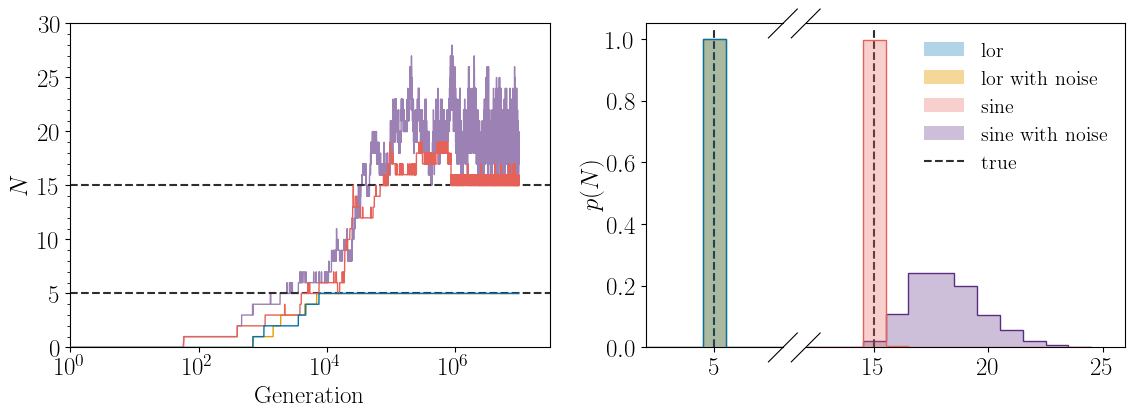

In [12]:
# set up figure
fig = plt.figure(figsize=(2*fig_width, fig_height))

## number trace plot
axs = fig.add_subplot(1,2,1)
axs.semilogx(Ngen, N_trace['sinusoids'][:end], color="#E66157", lw=1., zorder=10)
axs.semilogx(Ngen, N_trace['lines'][:end], color="#0072B2", lw=1., zorder=10)
axs.semilogx(Ngen_n, N_trace_n['sinusoids'], color="#5A2D82", lw=1., alpha=.6)
axs.semilogx(Ngen_n, N_trace_n['lines'], color="#E69F00", lw=1.)
axs.axhline(15, ls="--", color="#2E2E2E", alpha=1.)
axs.axhline(5, ls="--", color="#2E2E2E", alpha=1.)
axs.set_xlabel("Generation")
axs.set_ylabel("$N$")
axs.legend(loc="upper left", fontsize=14.5, frameon=False)
axs.set_xlim(1, 3e7)
axs.set_ylim(0, 30)

# add minorticks on x axis
axs.minorticks_on()

## posteriors on the number
# set up the binning
bins_with_integer_edges_lor = np.arange(2,10,1) - 0.5
bins_with_integer_edges_sine = np.arange(12,26,1) - 0.5


# add the broken axis
gs = fig.add_gridspec(1, 2)
bax = brokenaxes(xlims=((2, 8), (12, 26)), wspace=0.1, despine=False, subplot_spec=gs[0,1])

# posterior number of lorentzians
kwargs = dict(
    bins=bins_with_integer_edges_lor,
    density=True,
)

bax.hist(
    num_samples_lor,
    histtype="stepfilled",
    color="#0072B2",
    alpha=0.3,
    label="lor",
    **kwargs,
    zorder=10
)

bax.hist(
    num_samples_lor,
    histtype="step",
    color="#0072B2",
    alpha=1.,
    **kwargs,
    zorder=10
)

bax.hist(
    num_samples_lor_n,
    histtype="stepfilled",
    color="#E69F00",
    alpha=.4,
    label='lor with noise',
    **kwargs,
)

bax.hist(
    num_samples_lor_n,
    histtype="step",
    color="#E69F00",
    alpha=1.,
    **kwargs,
)

# posterior number of sinewaves
kwargs = dict(
    bins=bins_with_integer_edges_sine,
    density=True,
)

bax.hist(
    num_samples_sine,
    histtype="stepfilled",
    color="#E66157",
    alpha=0.3,
    label="sine",
    **kwargs,
    zorder=10,
)

bax.hist(
    num_samples_sine,
    histtype="step",
    color="#E66157",
    alpha=1.,
    **kwargs,
    zorder=10,
)

bax.hist(
    num_samples_sine_n,
    histtype="stepfilled",
    color="#5A2D82",
    alpha=0.3,
    label='sine with noise',
    **kwargs,
)

bax.hist(
    num_samples_sine_n,
    histtype="step",
    color="#5A2D82",
    alpha=1.,
    **kwargs,
)

bax.set_ylabel("$p(N)$")

# true values
bax.axvline(N_lor_true, color='#2E2E2E', lw=1.5, linestyle='--', ymax=.98, alpha=1., label='true')
bax.axvline(N_sine_true, color='#2E2E2E', lw=1.5, linestyle='--', ymax=.98, alpha=1.)

# set legend
bax.legend(loc='upper right', frameon=False, fontsize=14.5)

plt.savefig("../plots/sinewaves_lorentzians/Figure4.pdf", bbox_inches="tight")
plt.show()

In [13]:
# extract PETRA samples for one sine wave and one lorentzian
sine_samples = samples_n['sinusoids'][1]
lor_samples = samples_n['lines'][1]

C:\Users\Gabriele\AppData\Local\Temp\ipykernel_31136\177364309.py:38: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.ticker.NullLocator'>
  ax.locator_params(axis='y', nbins=3)
C:\Users\Gabriele\AppData\Local\Temp\ipykernel_31136\177364309.py:46: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.ticker.NullLocator'>
  axs[15].locator_params(axis='y', nbins=4)


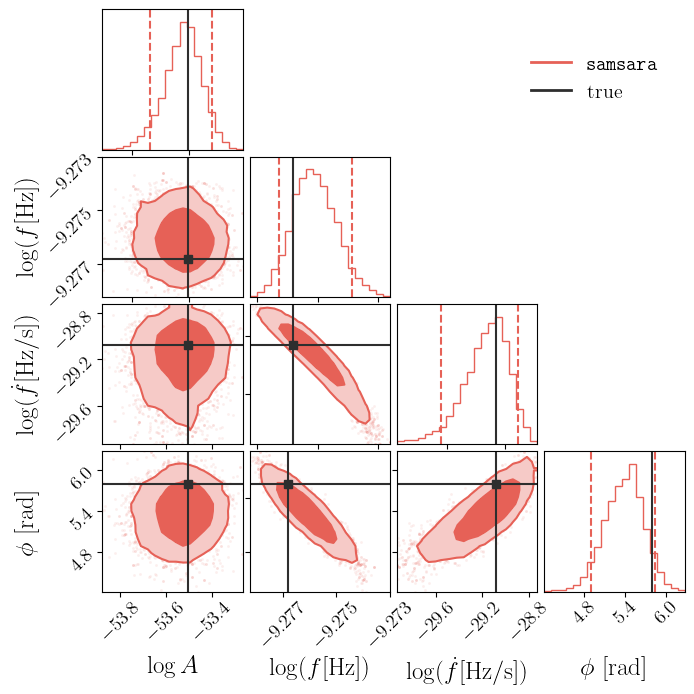

In [14]:
# Posterior on one sine wave
fig = plt.figure(figsize=square_size)

# kwargs for histogram aesthetics
kwargs = {
    "labels": ["$\\log A$", "$\\log (f[\\text{Hz}])$", "$\\log (\\dot{f}[\\text{Hz} / \\text{s}])$", "$\\phi$ [rad]"],
    "plot_datapoints": True,
    "quantiles": [.05, .95],
    "fill_contours": True,
    "truths": injected_parameters_n['sinusoids'][6],
    "truth_color": "#2E2E2E",
    "hist_kwargs": {"density": True, "alpha": 1.0, "color": "#E66157"},
    "levels": [0.68, 0.95],
    "linewidth": 2,
    "smooth": 0.6,
    "fig": fig,
}

# corner
fig_corner = corner.corner(sine_samples, color="#E66157", **kwargs)

# adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# set label padding to the minimum
for ax in plt.gcf().get_axes():
    xlabel = ax.xaxis.get_label()
    ylabel = ax.yaxis.get_label()
    xlabel.set_position((0.5, -.45))
    ylabel.set_position((-.45, 0.5))

axs = fig.get_axes()

# adjust ticks label
for ax in plt.gcf().get_axes():
    ax.tick_params(axis='x', pad=0.5, labelsize=14)
    ax.tick_params(axis='y', pad=0.5, labelsize=14)
    ax.locator_params(axis='y', nbins=3)
    ax.locator_params(axis='x', nbins=3)
axs[8].locator_params(axis='y', nbins=4)
axs[8].locator_params(axis='x', nbins=4)
axs[12].locator_params(axis='y', nbins=4)
axs[12].locator_params(axis='x', nbins=4)
axs[14].locator_params(axis='y', nbins=4)
axs[14].locator_params(axis='x', nbins=4)
axs[15].locator_params(axis='y', nbins=4)
axs[15].locator_params(axis='x', nbins=4)
axs[4].set_yticks([-9.277, -9.275, -9.273])
axs[13].set_xticks([-9.277, -9.275, -9.273])

# custom legend with two entries
legend_elements = [
    plt.Line2D([0], [0], color="#E66157", lw=2, label="\\texttt{samsara}"),
    plt.Line2D([0], [0], color="#2E2E2E", lw=2, label="true"),
]
fig.axes[2].legend(
    handles=legend_elements, loc="upper right", bbox_to_anchor=(2.0, 0.8),  frameon=False, fontsize=14.5,
)

plt.savefig("../plots/sinewaves_lorentzians/Figure5left.pdf", bbox_inches="tight")
plt.show()

C:\Users\Gabriele\AppData\Local\Temp\ipykernel_31136\385389142.py:41: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.ticker.NullLocator'>
  ax.locator_params(axis='y', nbins=4)


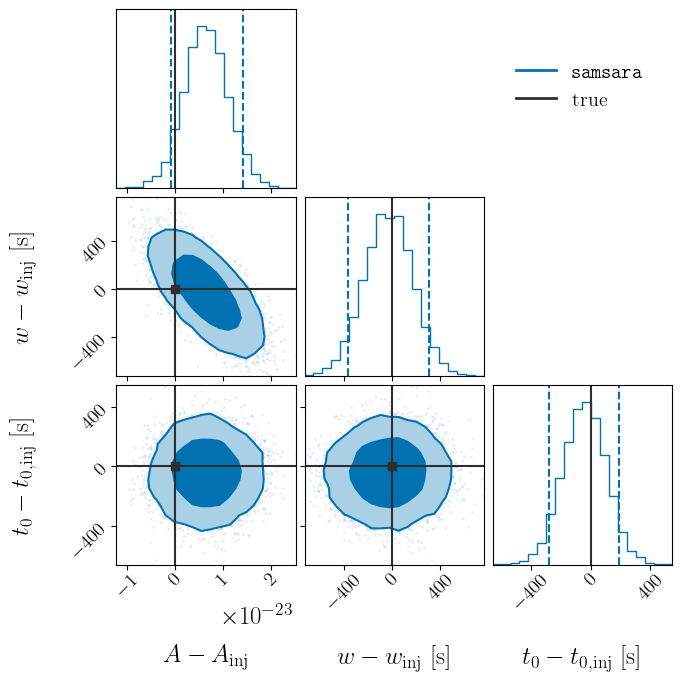

In [15]:
# posterior on one lorentzian
fig = plt.figure(figsize=square_size)

# kwargs for histogram aesthetics
kwargs = {
    "labels": ["$A - A_{\\rm inj}$", "$w - w_{\\rm inj}$ [s]", "$t_0 - t_{0,\\rm inj}$ [s]"],
    "plot_datapoints": True,
    "quantiles": [.05, .95],
    "fill_contours": True,
    "truths": np.zeros(3), # true parameters referred to themeselves, i.e., all zeros
    "truth_color": "#2E2E2E",
    "hist_kwargs": {"density": True, "alpha": 1.0, "color": "#0072B2"},
    "levels": [0.68, 0.95],
    "linewidth": 2,
    "smooth": 0.6,
    "fig": fig,
}

# refer the samples to the injected values
lor_samples[:,0] = lor_samples[:,0] - injected_parameters_n['lines'][2][0]
lor_samples[:,1] = lor_samples[:,1] - injected_parameters_n['lines'][2][1]
lor_samples[:,2] = lor_samples[:,2] - injected_parameters_n['lines'][2][2]

# corner
corner.corner(lor_samples, color="#0072B2", **kwargs)

# adjust the spacing
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# set label padding to the minimum
for ax in plt.gcf().get_axes():
    xlabel = ax.xaxis.get_label()
    ylabel = ax.yaxis.get_label()
    xlabel.set_position((0.5, -.45))
    ylabel.set_position((-.45, 0.5))

# adjust ticks label
for ax in plt.gcf().get_axes():
    ax.tick_params(axis='x', pad=0.5, labelsize=14)
    ax.tick_params(axis='y', pad=0.5, labelsize=14)
    ax.locator_params(axis='y', nbins=4)
    ax.locator_params(axis='x', nbins=4)

# custom legend with two entries
legend_elements = [
    plt.Line2D([0], [0], color="#0072B2", lw=2, label="\\texttt{samsara}"),
    plt.Line2D([0], [0], color="#2E2E2E", lw=2, label="true"), ##F0E442
]
fig.axes[1].legend(
    handles=legend_elements, loc="upper right", bbox_to_anchor=(2.0, 0.8),  frameon=False, fontsize=14.5,
)

plt.savefig("../plots/sinewaves_lorentzians/Figure5right.pdf", bbox_inches="tight")
plt.show()

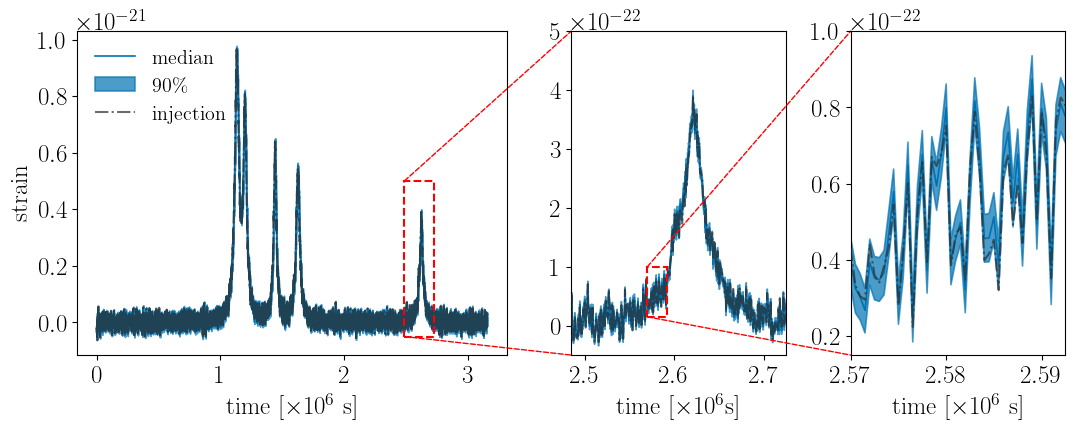

In [16]:
## plot the posterior on the signals

# set up the figure
fig = plt.figure(figsize=(2*fig_width, fig_height))
gs = GridSpec(1, 4, width_ratios=[2, 1, 1, 0.01], wspace=.3) 

ax_full = fig.add_subplot(gs[0])
ax_mid  = fig.add_subplot(gs[1])
ax_right = fig.add_subplot(gs[2])

# rescale kmodes to convert them in seconds
kmodes = kmodes * 500 / (1.e6)

# not zoomed plot
ax_full.plot(kmodes, percentiles_n[1,0,:], color='#0072B2', lw=1.2, label='median', alpha=1.)
ax_full.fill_between(kmodes, percentiles_n[0,0,:], percentiles_n[2,0,:], lw=1.2, color='#0072B2', alpha=.7, label='90$\\%$')
ax_full.plot(kmodes, 
             np.sum([s for s in inj_sig_n['lines']], axis=0)[0]+np.sum([s for s in inj_sig_n['sinusoids']], axis=0)[0], 
             color="#2E2E2E", lw=1.5, linestyle='-.', label='injection', alpha=.7,zorder=10)
ax_full.set_xlabel('time [$\\times 10^6$ s]')
ax_full.set_ylabel('strain')

# set legend
ax_full.legend(loc='upper left', frameon=False, fontsize=14.5)

# set the middle zoomed region within the full plot
x1, xmax = 4970*500/1e6, 5450*500/1e6
ymin, ymax = -5.e-23, .5e-21
rect1 = Rectangle((x1, ymin), xmax - x1, ymax - ymin,
                 linewidth=1.5, edgecolor='r', facecolor='none', linestyle='--', zorder=10)
ax_full.add_patch(rect1)

# set middle zoom plot
ax_mid.plot(kmodes, percentiles_n[1,0,:], color='#0072B2', lw=1.2, label='median', alpha=1.)
ax_mid.fill_between(kmodes, percentiles_n[0,0,:], percentiles_n[2,0,:], lw=1.2, color='#0072B2', alpha=.7)
ax_mid.plot(kmodes, np.sum([s for s in inj_sig_n['lines']], axis=0)[0]+np.sum([s for s in inj_sig_n['sinusoids']], axis=0)[0], color="#2E2E2E", lw=1.5, linestyle='-.', label='injection', alpha=.7,zorder=10)

ax_mid.set_xlim(x1, xmax)
ax_mid.set_ylim(ymin, ymax)
ax_mid.set_xlabel('time [$\\times 10^6$s]')

# connect rectangle corners to zoom axes
# top-left
con1 = ConnectionPatch(
    xyA=(x1, ymax), coordsA=ax_full.transData,
    xyB=(x1, ymax), coordsB=ax_mid.transData,
    color='r', linestyle='--'
)
# bottom-left
con2 = ConnectionPatch(
    xyA=(x1, ymin), coordsA=ax_full.transData,
    xyB=(x1, ymin), coordsB=ax_mid.transData,
    color='r', linestyle='--'
)

ax_mid.add_artist(con1)
ax_mid.add_artist(con2)

# set the more zoomed region within the middle plot
x3, x4 = 5140*500/1e6, 5185*500/1e6
ymin, ymax = 1.5e-23, 1e-22
rect2 = Rectangle((x3, ymin), x4-x3, ymax-ymin,
                  linewidth=1.5, edgecolor='r', facecolor='none', linestyle='--', zorder=10)
ax_mid.add_patch(rect2)

# set more zoomed plot
ax_right.plot(kmodes, percentiles_n[1,0,:], color='#0072B2', lw=1.2, label='median', alpha=1.)
ax_right.fill_between(kmodes, percentiles_n[0,0,:], percentiles_n[2,0,:], lw=1.2, color='#0072B2', alpha=.7)
ax_right.plot(kmodes, 
              np.sum([s for s in inj_sig_n['lines']], axis=0)[0]+np.sum([s for s in inj_sig_n['sinusoids']], axis=0)[0], 
              color="#2E2E2E", lw=1.5, linestyle='-.', label='injection', alpha=.7, zorder=10)

ax_right.set_xlim(x3, x4)
ax_right.set_ylim(ymin, ymax)
ax_right.set_xlabel('time [$\\times 10^6$ s]')

# connect rectangle corners to zoom axes
# top-left
con3 = ConnectionPatch(xyA=(x3, ymax), coordsA=ax_mid.transData,
                       xyB=(x3, ymax), coordsB=ax_right.transData,
                       color='r', linestyle='--')
# top-right
con4 = ConnectionPatch(xyA=(x3, ymin), coordsA=ax_mid.transData,
                       xyB=(x3, ymin), coordsB=ax_right.transData,
                       color='r', linestyle='--')
ax_right.add_artist(con3)
ax_right.add_artist(con4)

plt.savefig("../plots/sinewaves_lorentzians/Figure6.pdf", bbox_inches="tight")
plt.show()
plt.close()